In [1]:
from numpy.random import default_rng
import skimage.exposure
import numpy as np
import cv2

### Create Dataset

In [2]:
def random_quadrillage_generator_train(indice=1, width=500, height=500, sigmaX=10, sigmaY=10, thresh=200, blur=11, path='/content/quadrillage'):
  # define random seed to change the pattern
  rng = default_rng()
  # create random noise image
  noise = rng.integers(0, 255, (height,width), np.uint8, True)

  # blur the noise image to control the size
  blur = cv2.GaussianBlur(noise, (blur,blur), sigmaX, sigmaY, borderType = cv2.BORDER_DEFAULT)

  # stretch the blurred image to full dynamic range
  stretch = skimage.exposure.rescale_intensity(blur, in_range='image', out_range=(0,255)).astype(np.uint8)

  # threshold stretched image to control the size
  thresh = cv2.threshold(stretch, thresh, 255, cv2.THRESH_BINARY)[1]
  # apply morphology open and close to smooth out shapes
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  result = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
  result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)
  horizantal = np.random.randint(4, 15)
  verticale = np.random.randint(4, 15)
  result_blank = np.zeros(result.shape, np.uint8)

  for i in range (1, horizantal + 1):
    fact = np.random.randint(50, 100)
    ponte = np.random.randint(10, 20)
    #fact = 50
    h = 99 + i*ponte + fact
    cv2.line(result, (100,h), (400,h), (255,0,0), 2)
    cv2.line(result_blank, (100, h), (400, h), (255, 0, 0), 2)
  for i in range(1, verticale + 1):
    fact = np.random.randint(50, 100)
    ponte = np.random.randint(10, 20)
    v = 119 + i*ponte + fact
    cv2.line(result, (v,100), (v,400), (255,0,0), 2)
    cv2.line(result_blank, (v, 100), (v, 400), (255, 0, 0), 2)
  guess = np.random.randint(0, 1)
  if guess == 0:
    # Rotation
    rot = np.random.randint(-15, 15)
    (h, w) = result.shape[:2]
    center = (w / 2, h / 2)
    angle = rot
    scale = 1

    M = cv2.getRotationMatrix2D(center, angle, scale)
    result= cv2.warpAffine(result, M, (w, h))
    result_blank = cv2.warpAffine(result_blank, M, (w, h))
   # save result
  '''
  cv2.imwrite('quadrillage_dataset/input_train/'f'{indice}_{indice}.jpg', result)
  cv2.imwrite('quadrillage_dataset/target_train/'f'{indice}_{indice}.jpg', result_blank)
  '''
  return result, result_blank

In [3]:
def random_quadrillage_generator_test(indice=1, width=500, height=500, sigmaX=10, sigmaY=10, thresh=200, blur=11, path='/content/quadrillage'):
  # define random seed to change the pattern
  rng = default_rng()
  # create random noise image
  noise = rng.integers(0, 255, (height,width), np.uint8, True)

  # blur the noise image to control the size
  blur = cv2.GaussianBlur(noise, (blur,blur), sigmaX, sigmaY, borderType = cv2.BORDER_DEFAULT)

  # stretch the blurred image to full dynamic range
  stretch = skimage.exposure.rescale_intensity(blur, in_range='image', out_range=(0,255)).astype(np.uint8)

  # threshold stretched image to control the size
  thresh = cv2.threshold(stretch, thresh, 255, cv2.THRESH_BINARY)[1]
  # apply morphology open and close to smooth out shapes
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  result = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
  result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)
  horizantal = np.random.randint(4, 15)
  verticale = np.random.randint(4, 15)
  result_blank = np.zeros(result.shape, np.uint8)
  for i in range (1, horizantal + 1):
    fact = np.random.randint(50, 100)
    ponte = np.random.randint(10, 20)
    #fact = 50
    h = 99 + i*ponte + fact
    cv2.line(result, (100,h), (400,h), (255,0,0), 2)
    cv2.line(result_blank, (100, h), (400, h), (255, 0, 0), 2)
  for i in range(1, verticale + 1):
    fact = np.random.randint(50, 100)
    ponte = np.random.randint(10, 20)
    v = 119 + i*ponte + fact
    cv2.line(result, (v,100), (v,400), (255,0,0), 2)
    cv2.line(result_blank, (v, 100), (v, 400), (255, 0, 0), 2)
  guess = np.random.randint(0, 1)
  if guess == 0:
    # Rotation
    rot = np.random.randint(-15, 15)
    (h, w) = result.shape[:2]
    center = (w / 2, h / 2)
    angle = rot
    scale = 1

    M = cv2.getRotationMatrix2D(center, angle, scale)
    result= cv2.warpAffine(result, M, (w, h))
    result_blank = cv2.warpAffine(result_blank, M, (w, h))
   # save result
  '''
  cv2.imwrite('quadrillage_dataset/input_test/'f'{indice}_{indice}.jpg', result)
  cv2.imwrite('quadrillage_dataset/target_test/'f'{indice}_{indice}.jpg', result_blank)
  '''
  return result, result_blank

In [4]:
input_train = np.zeros((20000, 28, 28))
target_train = np.zeros((20000, 28, 28))
input_test = np.zeros((1000, 28, 28))
target_test = np.zeros((1000, 28, 28))

In [5]:
for i in range(1000):
  width = np.random.randint(200, 800)
  height = np.random.randint(200, 800)
  sigmaX = np.random.randint(10, 15)
  sigmaY = np.random.randint(10, 15)
  thresh = np.random.randint(180, 210)
  while True:
    blur = np.random.randint(11,15)
    if not blur%2 == 0:
      break
  result, result_noise = random_quadrillage_generator_test(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
  result = cv2.resize(result, (28, 28))
  result_noise = cv2.resize(result_noise, (28, 28))
  input_test[i] += result
  target_test[i] += result_noise
  if i == 999:
    print('Done')

Done


In [6]:
for i in range(20000):
  width = np.random.randint(200, 800)
  height = np.random.randint(200, 800)
  sigmaX = np.random.randint(10, 15)
  sigmaY = np.random.randint(10, 15)
  thresh = np.random.randint(180, 210)
  while True:
    blur = np.random.randint(11,15)
    if not blur%2 == 0:
      break
  result, result_noise = random_quadrillage_generator_train(i, width=width, height=height, sigmaX=sigmaX, sigmaY=sigmaY, thresh=thresh, blur=blur)
  result = cv2.resize(result, (28, 28))
  result_noise = cv2.resize(result_noise, (28, 28))
  input_train[i] += result
  target_train[i] += result_noise
  if i == 59999:
    print('Done')

In [7]:
with open('input_train.npy', 'wb') as f:
  np.save(f, input_train)
with open('input_test.npy', 'wb') as f:
  np.save(f, input_test)
with open('target_train.npy', 'wb') as f:
  np.save(f, target_train)
with open('target_test.npy', 'wb') as f:
  np.save(f, target_test)

In [8]:
input_train = np.load('input_train.npy')
target_train = np.load('target_train.npy')
input_test = np.load('input_test.npy')
target_test = np.load('target_test.npy')

### Create Autoencoder

In [9]:
batch_size = 150
no_epochs = 50
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
noise_factor = 0.55
number_of_visualizations = 6

In [10]:
img_width = 28
img_height = 28
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [11]:
input_train, input_test

(array([[[[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

In [12]:
input_train_noisy = input_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=input_train.shape) 
input_test_noisy = input_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=input_test.shape) 

In [13]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Dropout, Dense
from keras.constraints import max_norm
from keras import backend as K
import matplotlib.pyplot as plt

In [14]:
input_img = keras.Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
import time

In [16]:
step = len(input_train)//batch_size
val_step = (len(input_train)*0.2//batch_size)

In [17]:
BeginTime = int(round(time.time() * 1000))
history = autoencoder.fit(
    y=input_train,
    x=input_train_noisy,
    epochs=13,
    batch_size=128,
    shuffle=True,
    validation_data=(input_test_noisy, input_test),
)
EndTime = int(round(time.time() * 1000))

Epoch 1/30
141/141 [==============================] - 825s 6s/step - loss: 0.1889 - val_loss: 0.1388
Epoch 2/30
141/141 [==============================] - 821s 6s/step - loss: 0.1296 - val_loss: 0.1241
Epoch 3/30
141/141 [==============================] - 813s 6s/step - loss: 0.1211 - val_loss: 0.1184
Epoch 4/30
141/141 [==============================] - 808s 6s/step - loss: 0.1164 - val_loss: 0.1137
Epoch 5/30
141/141 [==============================] - 818s 6s/step - loss: 0.1116 - val_loss: 0.1088
Epoch 6/30
141/141 [==============================] - 822s 6s/step - loss: 0.1075 - val_loss: 0.1052
Epoch 7/30
141/141 [==============================] - 818s 6s/step - loss: 0.1043 - val_loss: 0.1024
Epoch 8/30
141/141 [==============================] - 820s 6s/step - loss: 0.1019 - val_loss: 0.1004
Epoch 9/30
141/141 [==============================] - 823s 6s/step - loss: 0.1002 - val_loss: 0.0989
Epoch 10/30
141/141 [==============================] - 815s 6s/step - loss: 0.0990 - val_lo

In [18]:
print(EndTime)

1653047494476


In [19]:
autoencoder.save('modelquad_autoencoder_denoising.h5')

In [20]:
prediction = autoencoder.predict(input_test_noisy)
prediction

array([[[[0.0087454 ],
         [0.0077951 ],
         [0.00550315],
         ...,
         [0.00305599],
         [0.0035688 ],
         [0.00364491]],

        [[0.00345588],
         [0.00791717],
         [0.00423181],
         ...,
         [0.00362661],
         [0.00395411],
         [0.00262555]],

        [[0.00654665],
         [0.01402971],
         [0.00681475],
         ...,
         [0.00428668],
         [0.00363064],
         [0.00275856]],

        ...,

        [[0.0078319 ],
         [0.00466964],
         [0.00872204],
         ...,
         [0.00265813],
         [0.0018945 ],
         [0.00188237]],

        [[0.0064207 ],
         [0.00417468],
         [0.00826183],
         ...,
         [0.00220323],
         [0.00159821],
         [0.00211269]],

        [[0.01196021],
         [0.00675467],
         [0.00966772],
         ...,
         [0.00275114],
         [0.00215173],
         [0.00335544]]],


       [[[0.00529587],
         [0.00424549],
         [0.00

In [31]:
prediction = prediction * 255
prediction = prediction.astype('uint8')

In [41]:
prediction = np.reshape(prediction, (prediction.shape[0], 28, 28))

ValueError: ignored

In [ ]:
prediction[0]

In [42]:
img = cv2.resize(prediction[2], (500, 500))

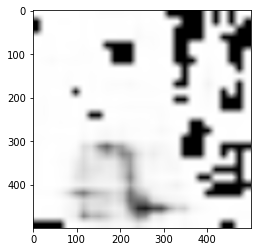

In [43]:
plt.imshow(img, cmap='Greys_r')